# Initialization

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np

import scqubits as qubit
import scqubits.utils.plotting as plot

# 0-pi qubit without disorder

$H_\text{sym}=-2E_\text{CJ}\partial_\phi^2+2E_{\text{C}\Sigma}(i\partial_\theta-n_g)^2-2E_\text{J}\cos\theta\cos(\phi-\varphi_\text{ext}/2)+E_L\phi^2+2E_\text{J}$

In [3]:
# parameters for the 0-\pi circuit

phi_grid = qubit.Grid1d(-6*np.pi, 6*np.pi, 200)

EJ_CONST = 1/3.95  # note that EJ and ECJ are interrelated

zero_pi = qubit.ZeroPi(
    grid = phi_grid,
    EJ   = EJ_CONST,
    EL   = 10.0**(-2),
    ECJ  = 1/(8.0*EJ_CONST),
    EC = None,
    ECS  = 10.0**(-3),
    ng   = 0.1,
    flux = 0.23,
    ncut = 30
)

In [4]:
zero_pi = qubit.ZeroPi.create()

Output()

In [3]:
print(zero_pi)

ZEROPI
 ———— PARAMETERS ————
EJ	: 0.25
EL	: 0.01
ECJ	: 0.49
EC	: 0.001
dEJ	: 0.0
dCJ	: 0.0
ng	: 0.1
flux	: 0.23
grid	:     Grid1d ......
max_val	: 19.0
min_val	: -19.0
pt_count	: 200
ncut	: 30
truncated_dim	: None
Hilbert space dimension	: 12200


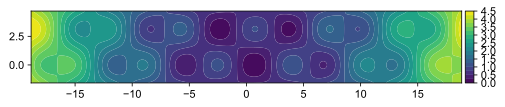

In [11]:
### Potential energy for symmetric 0-$\pi$ qubit
zero_pi.plot_potential(contour_vals=20);

### Eigenenergies

In [5]:
zero_pi.flux = 0.23
evals = zero_pi.eigenvals()

In [6]:
evals

array([0.46013402, 0.49073909, 0.5024677 , 0.51986416, 0.53153435,
       0.54722838])

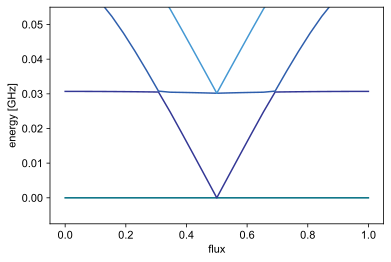

In [7]:
flux_list = np.linspace(0, 1, 27)
zero_pi.plot_evals_vs_paramvals('flux', flux_list, subtract_ground=True, ymax=0.055);

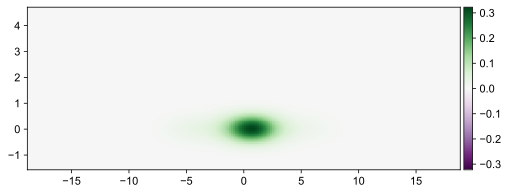

In [7]:
esys = zero_pi.eigensys()
zero_pi.plot_wavefunction(esys, which=0, mode='abs', zero_calibrate=True);

# 0-pi qubit with disorder in EJ and ECJ (zeta-mode remains decoupled)

$H = H_\text{sym}
+2E_{C\Sigma}dC_J\,\partial_\phi\partial_\theta + E_J dE_J \sin\theta\sin(\phi-\phi_\text{ext}/2)$

In [8]:
phi_grid = qubit.Grid1d(-8*np.pi, 8*np.pi, 200)

# parameters
EJ_CONST = 1/3.95

zeropi_dis = qubit.ZeroPi(
    grid = phi_grid,
    ncut = 30,
    EJ  = EJ_CONST,
    dEJ = 0.1,
    EL  = 10.0**(-3),
    ECJ = 1 / (8.0*EJ_CONST),
    dCJ = 0.1,
    ECS = 10.0**(-3),
    EC = None,
    ng  = 0.3,
    flux = 0.2
)

In [9]:
print(zeropi_dis)

0-PI
 ———— PARAMETERS ————
EJ	: 0.2531645569620253
EL	: 0.001
ECJ	: 0.4937500000000001
EC	: 0.001002029426686961
dEJ	: 0.1
dCJ	: 0.1
ng	: 0.3
flux	: 0.2
grid	:     Grid (1d) ......
max_val	: 25.132741228718345
min_val	: -25.132741228718345
pt_count	: 200
ncut	: 30
truncated_dim	: None
Hilbert space dimension	: 12200


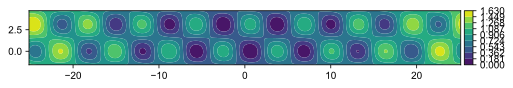

In [6]:
zeropi_dis.plot_potential(contour_vals=np.linspace(0,1.63,10));

In [7]:
evals = zeropi_dis.eigenvals()
print(evals)

[0.42778386 0.42854964 0.45620118 0.45685018 0.46941385 0.47730651]


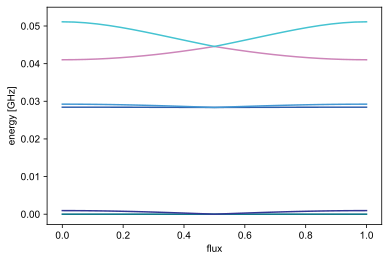

In [8]:
flux_list = np.linspace(0, 1, 27)
zeropi_dis.plot_evals_vs_paramvals('flux', flux_list, subtract_ground=True, ymax=0.055);

In [15]:
 _, evecs = zeropi_dis.eigensys(evals_count=2)
evecs_calculated = evecs.T[1][4000:4100]

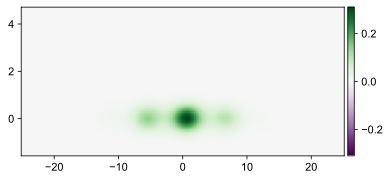

In [10]:
esys = zeropi_dis.eigensys()
zeropi_dis.plot_wavefunction(esys, which=0, mode='abs');